In [ ]:
from skimage import data

1.	Geometric Transforms using inbuilt functions. 

In [ ]:
import matplotlib.pyplot as plt
from skimage.transform import warp
from skimage import data
from skimage.transform import SimilarityTransform


a)	Translation:

	Translate the input image by βx and βy = (30, -10)

In [ ]:
import cv2
import numpy as np

In [ ]:
img = data.camera()

In [ ]:
from google.colab.patches import cv2_imshow

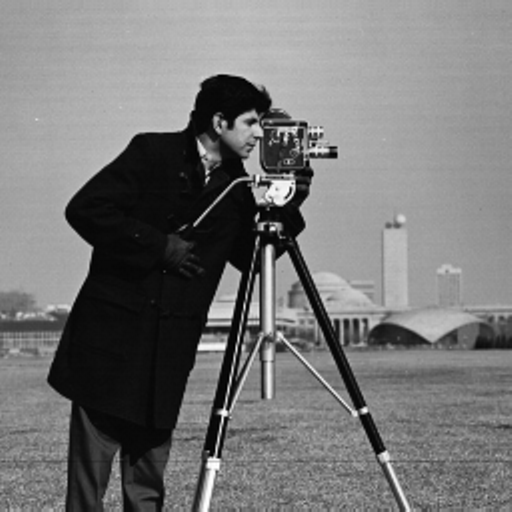

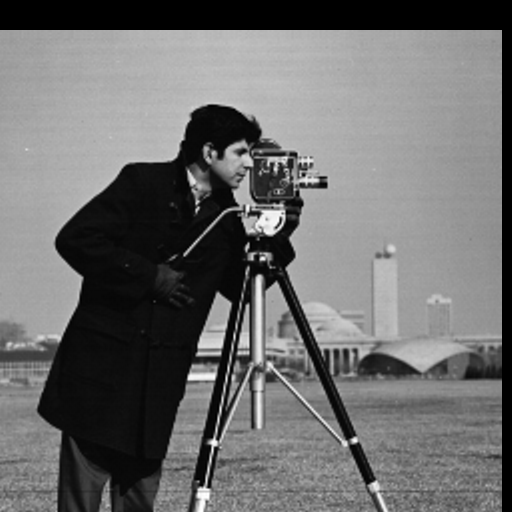

In [ ]:
height, width = img.shape[:2]   
n_height, n_width = 30, -10  
T = np.float32([[1, 0, n_width], [0, 1, n_height]])   
img_translation = cv2.warpAffine(img, T, (width, height)) 
cv2_imshow(img) 
cv2_imshow(img_translation) 
cv2.waitKey() 
  
cv2.destroyAllWindows() 

	Translate the input image by (30, 10)

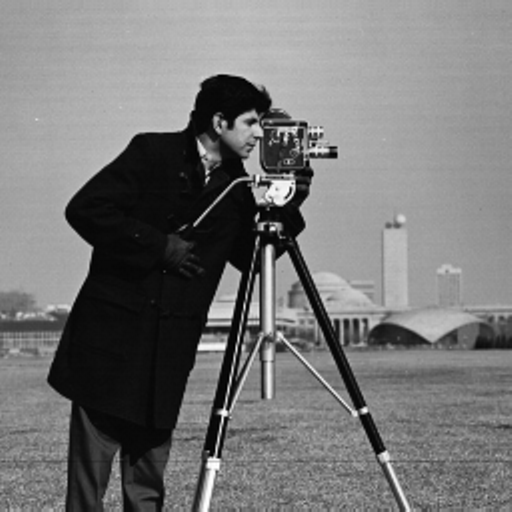

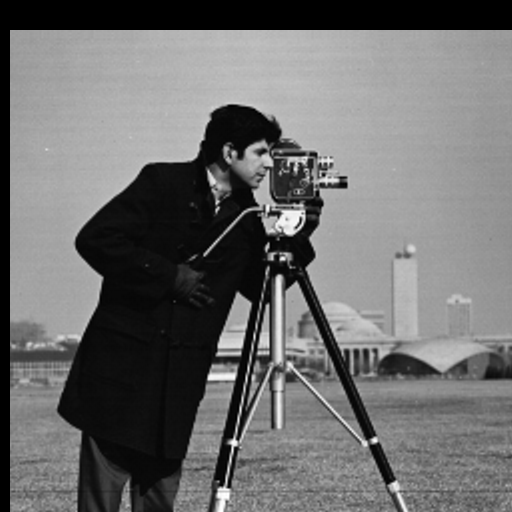

In [ ]:
height, width = img.shape[:2] 
  
n_height, n_width = 30, 10
  
T = np.float32([[1, 0, n_width], [0, 1, n_height]]) 
   
img_translation = cv2.warpAffine(img, T, (width, height)) 
  
cv2_imshow(img) 
cv2_imshow(img_translation) 
cv2.waitKey() 
  
cv2.destroyAllWindows()

b)	Scale, rotation, translation 

In [ ]:
import cv2

In [ ]:
pip install opencv-python

In [ ]:
from google.colab.patches  import cv2_imshow

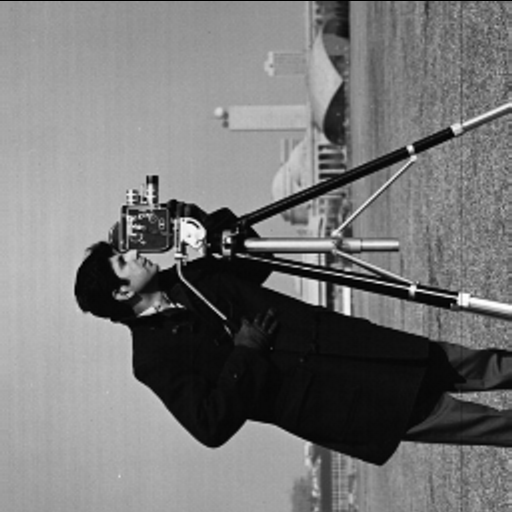

In [ ]:
%matplotlib inline
img = data.camera()
rows,cols = img.shape
#scaling
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
#translation
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
#rotation
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

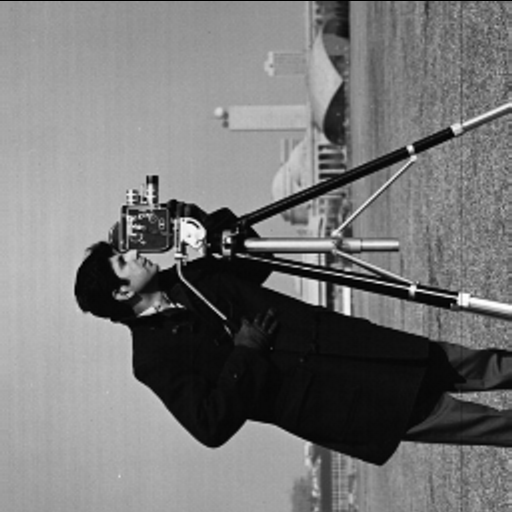

In [ ]:
#scaling
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = data.camera()
rows,cols = img.shape

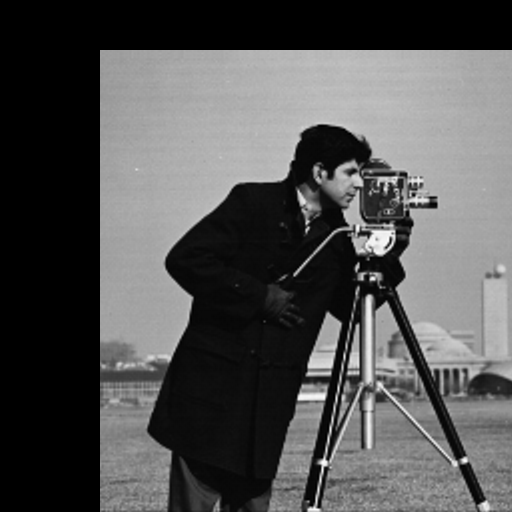

In [ ]:
#translation
M= np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

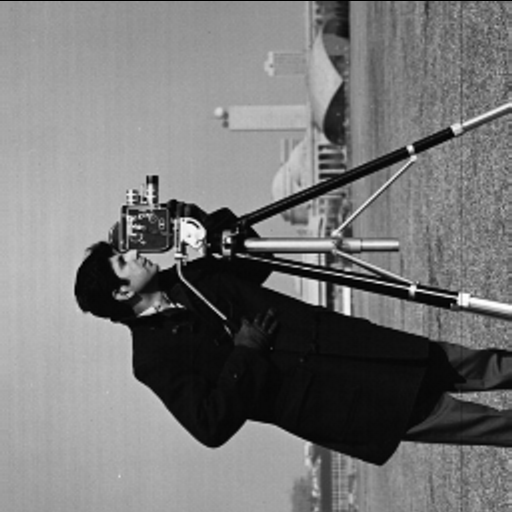

In [ ]:
#rotation
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

2.	Perform the following geometric transforms without using inbuilt functions.

a)	Apply the horizontal shear (shear parallel to the x axis) on the image with shear factor = 2. It converts the coordinates from (x,y) to the point (x+my, y) where m is the shear factor.

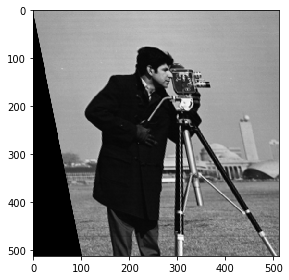

In [ ]:
from skimage import io
from skimage import transform as tf

# Load the image as a matrix
img = data.camera()
afine_tf = tf.AffineTransform(shear=0.2)
modified = tf.warp(img, inverse_map=afine_tf)
io.imshow(modified)
io.show()

b)	Apply the vertical shear (shear parallel to the y axis) on the image with shear factor = 3. It converts the coordinates from (x,y) to the point (x, mx+y) where m is the shear factor.

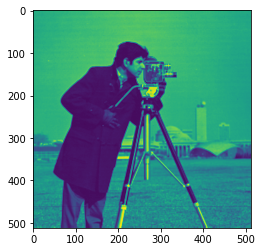

In [ ]:
from skimage import data, transform
import matplotlib.pyplot as plt
import numpy as np
img = data.camera()
v = 3

tf = transform.AffineTransform(shear=-v)
#img2 = transform.warp(img, tf, order=1, preserve_range=True, mode='constant')

#img3 = np.swapaxes(img, 0, 1)
#img3 = transform.warp(img3, tf, order=1, preserve_range=True, mode='constant')
#img3 = np.swapaxes(img3, 0, 1)

plt.imshow(np.hstack([img]))
plt.show()


3.	Add salt and pepper noise to your input image using inbuilt function in Matlab/Python such as imnoise in Matlab. This noise is caused by sharp and sudden disturbances in the image signal. It presents itself as sparsely occurring white and black pixels. 

In [ ]:
from copy import deepcopy

In [ ]:
import numpy as np
import random
import cv2

def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('/content/einstein.png',0) # Only for grayscale image
noise_img = sp_noise(image,0.05)
cv2.imwrite('sp_noise.png', noise_img)

True

In [ ]:
display(noise_img)

array([[  0,  37,  46, ..., 149, 150, 149],
       [  0,  34,  43, ..., 151, 151, 149],
       [  0,  37,  46, ..., 152, 152, 149],
       ...,
       [  0,  80, 112, ...,  56,  51,  49],
       [  0,  90, 112, ...,  58,  54,  52],
       [  0,  85, 115, ...,  59,  55,  53]], dtype=uint8)

In [ ]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import image
%matplotlib inline

In [ ]:
imgsp=Image.open("/content/sp_noise.png")


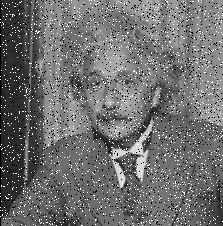

In [ ]:
imgsp

a) Write a program to implement spatial domain median filter to remove salt and pepper noise without using inbuilt functions. For every 3X3 area, find the median of the pixels and replace the center pixel by the median. 

In [ ]:
import cv2 
import numpy as np  
img_noisy1 = cv2.imread('/content/sp_noise.png', 0) 
m, n = img_noisy1.shape  
img_new1 = np.zeros([m, n]) 
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = [img_noisy1[i-1, j-1], 
               img_noisy1[i-1, j], 
               img_noisy1[i-1, j + 1], 
               img_noisy1[i, j-1], 
               img_noisy1[i, j], 
               img_noisy1[i, j + 1], 
               img_noisy1[i + 1, j-1], 
               img_noisy1[i + 1, j], 
               img_noisy1[i + 1, j + 1]] 
          
        temp = sorted(temp) 
        img_new1[i, j]= temp[4] 
  
img_new1 = img_new1.astype(np.uint8) 
cv2.imwrite('new_median_filtered.png', img_new1)

True

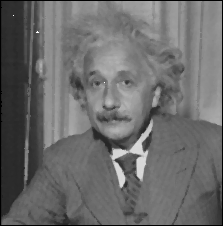

In [ ]:
img_new1=Image.open("new_median_filtered.png")
img_new1

b) Apply mean filtering as well on noisy image and find out which filter gives better result for salt and pepper noise.

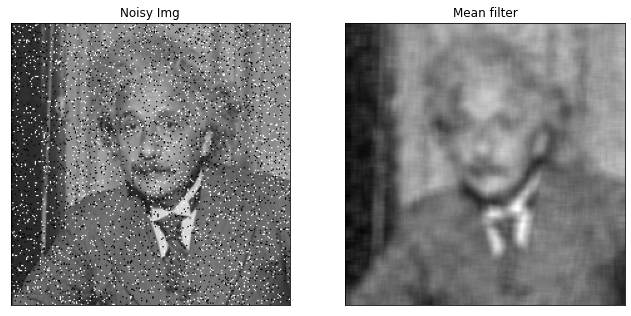

In [ ]:
imgm = cv2.imread('/content/sp_noise.png', 0)
figure_size = 9
new_image = cv2.blur(imgm,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(imgm, cmap='gray'),plt.title('Noisy Img')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

median filter gives better result

## OPTIONAL

5.	Perform the same experiment as problem 4, but with gaussian noise. Depending on whether image is bright or dark, you can add different levels of noise to the image. J = imnoise(I,'gaussian',m) adds Gaussian white noise with mean m and variance of 0.01. 

a) Reduce this Gaussian noise with mean/averaging filter. Study the effect of applying mean filters of 3x3 5x5, 7x7 on input images. 

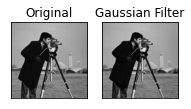

In [ ]:
new_image_gauss = cv2.GaussianBlur(img, (3,3),0)
plt.figure(figsize=(3,3))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

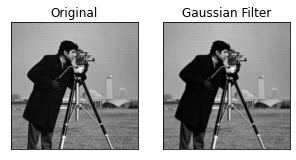

In [ ]:
new_image_gauss = cv2.GaussianBlur(img, (5,5),0)
plt.figure(figsize=(5,5))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

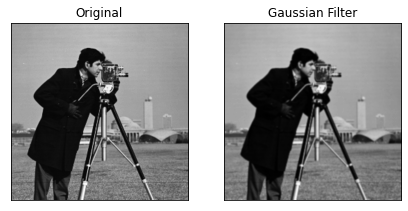

In [ ]:
new_image_gauss = cv2.GaussianBlur(img, (7,7),0)
plt.figure(figsize=(7,7))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

b) Also, study the effect of applying 3x3 median filter on the images. Compare results and note which ones are best.

In [ ]:
median = cv2.medianBlur(img,5)

In [ ]:
display(median)

array([[156, 157, 158, ..., 152, 152, 152],
       [157, 157, 157, ..., 152, 152, 152],
       [157, 157, 157, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)